#### Decision tree classification 
-  Iris dataset

### data ingestion

In [2]:
import pandas as pd
import numpy as  np
import  matplotlib.pyplot as  plt
import  seaborn as  sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
path  =  r"C:\Users\admin\Downloads\iris.xlsx"

In [5]:
df  =  pd.read_excel(path)

##### Basic Data Quality checks

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [ ]:
# drop  duplicates
df.drop_duplicates(inplace  =  True  ,  
                   keep  =  'first'  , 
                  ignore_index=  True)

### seperate  x  and  y

In [13]:
x  =  df.drop('species' , axis  =  1)
y  =  df['species']

####  create  pipeline
-  in this data  there  is  no  categorical  data  dont  have  need  to  seperate cat and num variables

In [14]:
from sklearn.pipeline  import Pipeline
from  sklearn.preprocessing  import StandardScaler   
from  sklearn.impute  import SimpleImputer
from sklearn.compose  import  ColumnTransformer

In [15]:
num_pipeline  =  Pipeline(steps  = [('imputer' ,  SimpleImputer(strategy  =  'mean') )   ,  
             ('scaler' ,  StandardScaler())]  )

In [16]:
num_pipeline  

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [18]:
x_scaled  =  num_pipeline.fit_transform(x)

In [19]:
x_scaled

array([[-0.8980334 ,  1.01240113, -1.33325507, -1.30862368],
       [-1.13956224, -0.1373532 , -1.33325507, -1.30862368],
       [-1.38109108,  0.32254853, -1.39001364, -1.30862368],
       [-1.5018555 ,  0.09259766, -1.2764965 , -1.30862368],
       [-1.01879782,  1.242352  , -1.33325507, -1.30862368],
       [-0.53574014,  1.9322046 , -1.16297935, -1.04548613],
       [-1.5018555 ,  0.78245027, -1.33325507, -1.17705491],
       [-1.01879782,  0.78245027, -1.2764965 , -1.30862368],
       [-1.74338434, -0.36730407, -1.33325507, -1.30862368],
       [-1.13956224,  0.09259766, -1.2764965 , -1.44019246],
       [-0.53574014,  1.47230287, -1.2764965 , -1.30862368],
       [-1.26032666,  0.78245027, -1.21973792, -1.30862368],
       [-1.26032666, -0.1373532 , -1.33325507, -1.44019246],
       [-1.86414876, -0.1373532 , -1.50353079, -1.44019246],
       [-0.05268246,  2.16215547, -1.44677222, -1.30862368],
       [-0.17344688,  3.08195894, -1.2764965 , -1.04548613],
       [-0.53574014,  1.

In [20]:
##  convert in dataframe
x_scaled =  pd.DataFrame(x_scaled ,  columns = x.columns )

In [21]:
x_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624
...,...,...,...,...
144,1.034197,-0.137353,0.823571,1.454321
145,0.551140,-1.287108,0.710054,0.928046
146,0.792668,-0.137353,0.823571,1.059614
147,0.430375,0.782450,0.937088,1.454321


###  train test  split

In [22]:
from sklearn.model_selection  import train_test_split

In [23]:
x.shape

(149, 4)

In [24]:
x_train  ,  x_test  ,  y_train , y_test =train_test_split(x_scaled  ,  y  , 
                    test_size  =  0.15  , 
                    random_state = 4)

In [25]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  ,  y_test.shape)

(126, 4) (126,)
(23, 4) (23,)


In [26]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
19,-0.898033,1.702254,-1.276496,-1.177055
134,0.309611,-1.057157,1.050605,0.270202
16,-0.535740,1.932205,-1.390014,-1.045486
20,-0.535740,0.782450,-1.162979,-1.308624
105,2.121077,-0.137353,1.618191,1.191183


In [27]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
25,-1.018798,-0.137353,-1.219738,-1.308624
11,-1.260327,0.782450,-1.219738,-1.308624
41,-1.622620,-1.747009,-1.390014,-1.177055
110,0.792668,0.322549,0.766812,1.059614
12,-1.260327,-0.137353,-1.333255,-1.440192


In [28]:
y_train.head()

19        setosa
134    virginica
16        setosa
20        setosa
105    virginica
Name: species, dtype: object

In [29]:
y_test.head()

25        setosa
11        setosa
41        setosa
110    virginica
12        setosa
Name: species, dtype: object

### fit  the model

In [31]:
from sklearn.tree  import DecisionTreeClassifier

In [32]:
model  =  DecisionTreeClassifier( criterion  = 'gini' ,  max_depth = 3 )

In [33]:
model.fit(x_train  , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
#  score
model.score(x_train  ,  y_train)

0.9761904761904762

In [35]:
model.score(x_test,  y_test)

0.9565217391304348

###  evaluate  model 


In [37]:
from sklearn.metrics import classification_report  , confusion_matrix ,  ConfusionMatrixDisplay

In [38]:
##  training evaluation 
train_pred   =  model.predict(x_train)


In [39]:
train_pred

array(['setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 

In [40]:
print(classification_report(y_train  , train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        37
  versicolor       0.98      0.95      0.97        44
   virginica       0.96      0.98      0.97        45

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [42]:
cf  =  confusion_matrix(y_train  ,  train_pred)

In [47]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: >

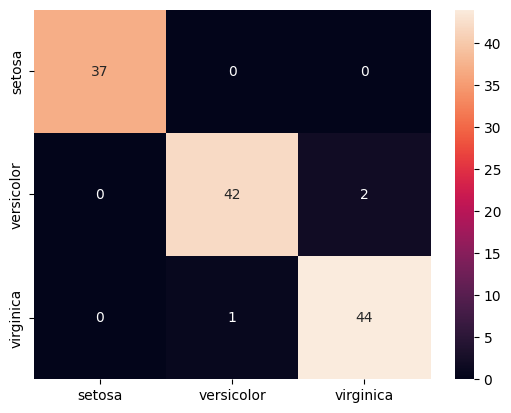

In [48]:
sns.heatmap(cf  ,  xticklabels  = ['setosa', 'versicolor', 'virginica']  , 
 yticklabels  =  ['setosa', 'versicolor', 'virginica']  ,
 annot  =  True  ,  fmt  =  'd')